# 모델 세부 설정-Callback-MNIST

In [9]:
import tensorflow as tf

# mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()


11490434/11490434 [==============================] - 2s 0us/step


## 모델 체크포인트

In [10]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', \
              optimizer='adam')

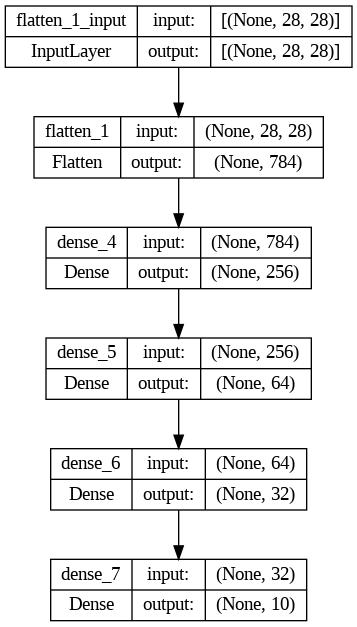

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [13]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoint.ckpt', \
                                                 save_weight=True, \
                                                 save_best_only=True, \
                                                 mornitor='val_loss', \
                                                 verbose=1)

In [14]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[checkpoint])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9302
Epoch 1: val_loss improved from inf to 0.12263, saving model to ./tmp_checkpoint.ckpt
1875/1875 [==============================] - 13s 4ms/step - loss: 0.2327 - accuracy: 0.9302 - val_loss: 0.1226 - val_accuracy: 0.9611
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9707
Epoch 2: val_loss improved from 0.12263 to 0.08408, saving model to ./tmp_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0953 - accuracy: 0.9707 - val_loss: 0.0841 - val_accuracy: 0.9736
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9798
Epoch 3: val_loss did not improve from 0.08408
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0493 - ac

In [15]:
# 모델 체크포인트 로드 전
print('마지막 에폭을 완료하고 마지막 가중치를 가진 모델의 성능')
print(model.evaluate(x_test, y_test))

# 체크포인트 파일을 모델에 로드
print('체크포인트에 저장된 best weight를 로드한 모델의 성능')
model.load_weights('./tmp_checkpoint.ckpt')
print(model.evaluate(x_test, y_test))

# 결과 설명
## 체크포인트 설정에 loss로 설정을 했기 때문에 loss가 낮아졌다면 잘 작동했다고 볼수있음
## 체크포인트 설정에 accuracy까지 설정을 하게되면 loss와 정확도를 같이 확인할수있다.

마지막 에폭을 완료하고 마지막 가중치를 가진 모델의 성능
313/313 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9789
[0.09019912034273148, 0.9789000153541565]
체크포인트에 저장된 best weight를 로드한 모델의 성능
313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9824
[0.07089263200759888, 0.9824000000953674]


### 2차 모델 체크포인트 설정

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', \
              optimizer='adam')

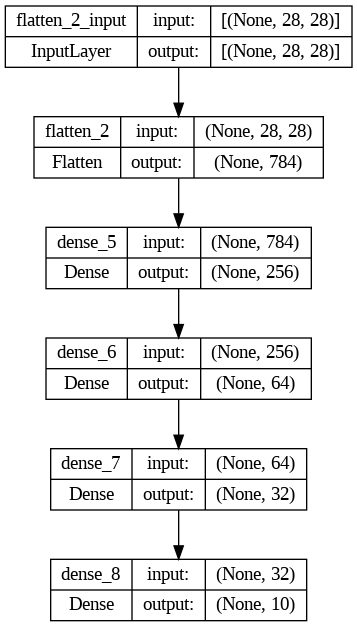

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoint.ckpt', \
                                                 save_weight=True, \
                                                 save_best_only=True, \
                                                 mornitor=['val_loss', 'accuracy'], \
                                                 verbose=1)

In [ ]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[checkpoint])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9335
Epoch 1: val_loss improved from inf to 0.11585, saving model to ./tmp_checkpoint.ckpt
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2261 - accuracy: 0.9335 - val_loss: 0.1159 - val_accuracy: 0.9641
Epoch 2/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0924 - accuracy: 0.9719
Epoch 2: val_loss improved from 0.11585 to 0.09028, saving model to ./tmp_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0925 - accuracy: 0.9718 - val_loss: 0.0903 - val_accuracy: 0.9714
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9801
Epoch 3: val_loss improved from 0.09028 to 0.07677, saving model to ./tmp_checkpoint.ckpt
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 4/10
1873/1875 [===================

In [ ]:
# 모델 체크포인트 로드 전
print('마지막 에폭을 완료하고 마지막 가중치를 가진 모델의 성능')
print(model.evaluate(x_test, y_test))

# 체크포인트 파일을 모델에 로드
print('체크포인트에 저장된 best weight를 로드한 모델의 성능')
model.load_weights('./tmp_checkpoint.ckpt')
print(model.evaluate(x_test, y_test))

# 결과 설명
## 체크포인트 설정에 loss와 accuracy로 설정을 했기 때문에 둘다 잘 작동했다고 볼수있음

마지막 에폭을 완료하고 마지막 가중치를 가진 모델의 성능
313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9763
[0.10473643988370895, 0.9763000011444092]
체크포인트에 저장된 best weight를 로드한 모델의 성능
313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9802
[0.0694219246506691, 0.9801999926567078]


## 조기종료(Early-Stopping)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# EarlyStopping 콜백 생성
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.fit(x_train,y_train,
          validation_data=(x_test, y_test),
          epochs=20,
          callbacks=[earlystopping]
          )

# 결과 정리
## val_loss값에서 기준값(최소값)보다 3번 이상 성능계산이 되지않을때, 모델학습을 종료한다

Epoch 1/20
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2245 - accuracy: 0.9316 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9720 - val_loss: 0.1019 - val_accuracy: 0.9691
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.0755 - val_accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0877 - val_accuracy: 0.9764
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.1068 - val_accuracy: 0.9706
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0925 - val_accuracy: 0.9756


##  학습률 스케줄러

In [5]:
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [7]:
model.compile(optimizer='adam', loss='sparese_categorical_crossentropy', metrics='accuracy')
# 초기 학습률 확인(0.01)
model.optimizer.lr.numpy()

0.001

In [8]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[lr_scheduler])


# 최종 학습률 스케줄러 확인


NameError: ignored

In [ ]:
##########################################

In [17]:
model.save('mnist_model.h5')

In [19]:
mnist_model = tf.keras.models.load_model('mnist_model.h5')

In [20]:
mnist_model